In [1]:
%matplotlib inline

# Separate Hymenoptera Superfamilies Apoidea & Vespoidea
(Bees and Wasps)

Source Code:
Author: Sasank Chilamkurthy, BSD License

Entomology data:
From Aguiar et al. (2013)
Zootaxa 3703 (1): 051 – 062

"The taxa of Hymenoptera are divided into two suborders (Symphyta and Apocrita), with 27 superfamilies (9 superfamilies in Symphyta and 18 in Apocrita) and 132 families. It is noteworthy that 17 of these families have been described since year 2000 and that 16 of these newly recognized families represent now extinct families only known from fossils. New genera and species are frequently encountered and our most recent estimate total 8423 extant genera with an additional 685 extinct genera. Considered one of the most species-rich insect orders, behind only Coleoptera and Lepidoptera, there is a total of 153088 extant and described species, in addition to 2429 extinct described species."

For this lab we will attempt to sort two Apocrita superfamilies Vespoidea and Apoidea. I have excluded groups that are relatively rare and extinct.

The Family Sphecidae (sphecid wasps) contains more than 1,100 North American Species. This group is a member of the superfamily Apoidae and resemble the ancestor of modern bees.  They are separated from the Vespoids by their pronotum: 'in the dorsal view the posterior margin is straight, and there is usually a constriction between it and the mesoscutum (forming the collar)'. (Borror & Delong 2005) .  I have excluded the sphecids wasps from 

Included families for Superfamily Apoidea: Andrenidae, Apidae, Colletidae, Halictidae and Megachillidae.

For the Superfamily Vespoidea I have included training images from the following Families: Formicidae, Mutillidae, Pompilidae, Sapygidae, Scoliidae, Tiphiidae and Vespidae.  Again for now I have excluded rare or extinct Families: Bradynobaenidae, Rhopalosomatidae, Sapygidae and Sierolomorphidae.


25-Nov-2023, Changed folder names to the Superfamilies Apoidea and Vespoidea.  Added more images from bugguide.net and balanced training and evaluation folders to approximately 80% and 20% respectively. 




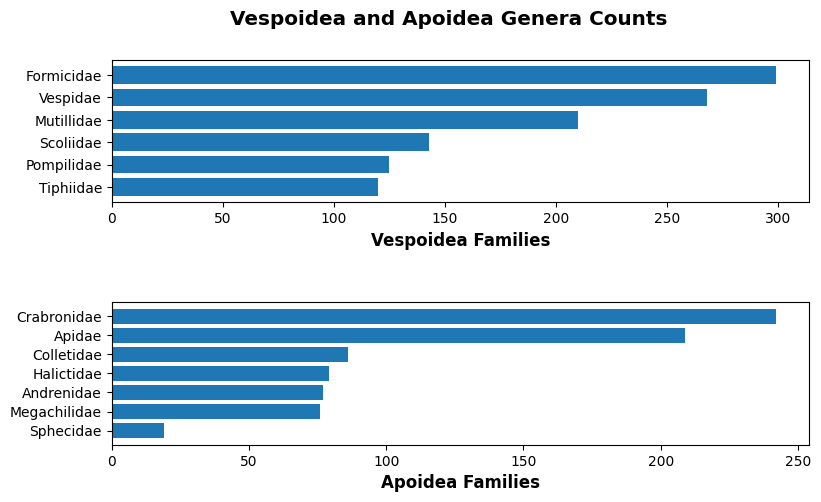

In [4]:
import matplotlib.pyplot as plt

#Genera and species data from 2012 "Order Hymenoptera" by Aguiar et al, Zootaxa 3703 (1): 051-062
#ISSN 1175-5334
#https://www.mapress.com/zootaxa/2013/f/zt03703p062.pdf



#organize data into a dictionary
vespoidea_genera = {'Tiphiidae': 120, 'Pompilidae': 125,
                    'Scoliidae': 143, 'Mutillidae': 210,
                    'Vespidae': 268, 'Formicidae': 299}


names_vespoidea = list(vespoidea_genera.keys())
values_vespoidea = list(vespoidea_genera.values())


apoidea_genera = {'Sphecidae': 19, 'Megachilidae': 76,
                  'Andrenidae': 77, 'Halictidae': 79,
                  'Colletidae': 86, 'Apidae': 209,
                  'Crabronidae': 242}
            

names_apoidea = list(apoidea_genera.keys())
values_apoidea = list(apoidea_genera.values())

#set display parameters
fig, axs = plt.subplots(2, 1, figsize=(9, 5))

axs[0].barh(names_vespoidea, values_vespoidea)
axs[0].set_xlabel('Vespoidea Families', fontsize='large', fontweight='bold')

axs[1].barh(names_apoidea, values_apoidea)
axs[1].set_xlabel('Apoidea Families', fontsize='large', fontweight='bold')

plt.subplots_adjust(wspace=0, hspace=0.7)
fig.suptitle('Vespoidea and Apoidea Genera Counts', fontsize='x-large', fontweight='bold')

#display graph
#plt.grid()
#save graph to a file
plt.savefig('../data/processed/vespoideaApoideaGenera.png', dpi=400, bbox_inches='tight')

Text(0.5, 0.98, 'Vespoidea and Apoidea Genera Counts')

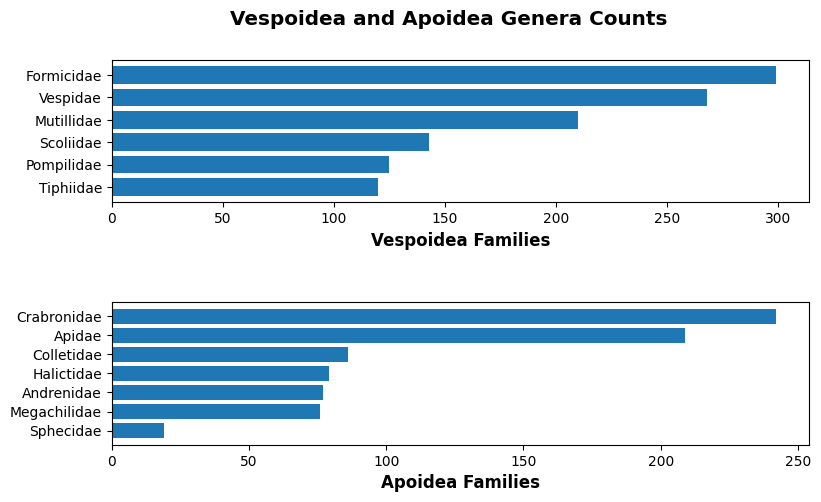

In [16]:
import matplotlib.pyplot as plt

#Genera and species data from 2012 "Order Hymenoptera" by Aguiar et al, Zootaxa 3703 (1): 051-062
#ISSN 1175-5334
#https://www.mapress.com/zootaxa/2013/f/zt03703p062.pdf



#organize data into a dictionary
vespoidea_genera = {'Tiphiidae': 120, 'Pompilidae': 125,
                    'Scoliidae': 143, 'Mutillidae': 210,
                    'Vespidae': 268, 'Formicidae': 299}


names_vespoidea = list(vespoidea_genera.keys())
values_vespoidea = list(vespoidea_genera.values())


apoidea_genera = {'Sphecidae': 19, 'Megachilidae': 76,
                  'Andrenidae': 77, 'Halictidae': 79,
                  'Colletidae': 86, 'Apidae': 209,
                  'Crabronidae': 242}
            

names_apoidea = list(apoidea_genera.keys())
values_apoidea = list(apoidea_genera.values())

#set display parameters
fig, axs = plt.subplots(2, 1, figsize=(9, 5))

axs[0].barh(names_vespoidea, values_vespoidea)
axs[0].set_xlabel('Vespoidea Families', fontsize='large', fontweight='bold')

axs[1].barh(names_apoidea, values_apoidea)
axs[1].set_xlabel('Apoidea Families', fontsize='large', fontweight='bold')

plt.subplots_adjust(wspace=0, hspace=0.7)
fig.suptitle('Vespoidea and Apoidea Genera Counts', fontsize='x-large', fontweight='bold')

#display graph
#plt.grid()
#save graph to a file
#plt.savefig('../data/processed/vespoideaApoideaGenera.png', dpi=400, bbox_inches='tight')

# Transfer Learning for Computer Vision Tutorial
**Author**: [Sasank Chilamkurthy](https://chsasank.github.io)

https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

In this tutorial, you will learn how to train a convolutional neural network for
image classification using transfer learning. You can read more about the transfer
learning at [cs231n notes](https://cs231n.github.io/transfer-learning/)_

Quoting these notes,

    In practice, very few people train an entire Convolutional Network
    from scratch (with random initialization), because it is relatively
    rare to have a dataset of sufficient size. Instead, it is common to
    pretrain a ConvNet on a very large dataset (e.g. ImageNet, which
    contains 1.2 million images with 1000 categories), and then use the
    ConvNet either as an initialization or a fixed feature extractor for
    the task of interest.

These two major transfer learning scenarios look as follows:

-  **Finetuning the ConvNet**: Instead of random initialization, we
   initialize the network with a pretrained network, like the one that is
   trained on imagenet 1000 dataset. Rest of the training looks as
   usual.
-  **ConvNet as fixed feature extractor**: Here, we will freeze the weights
   for all of the network except that of the final fully connected
   layer. This last fully connected layer is replaced with a new one
   with random weights and only this layer is trained.


In [1]:
# License: BSD
# Author: Sasank Chilamkurthy

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()   # interactive mode

## Load Data

Update 20-Nov-2023, removed images from train and val folders that were incorrect, poor quality, a graphic rendering, and mimics.
Some the removed images were of other animals that mimic the warning colors of wasps and bees. 


We will use torchvision and torch.utils.data packages for loading the
data.

The problem we're going to solve today is to train a model to classify
**ants** and **bees**. We have about 120 training images each for ants and bees.
There are 75 validation images for each class. Usually, this is a very
small dataset to generalize upon, if trained from scratch. Since we
are using transfer learning, we should be able to generalize reasonably
well.

This dataset is a very small subset of imagenet.

.. Note ::
   Download the data from
   [here](https://download.pytorch.org/tutorial/hymenoptera_data.zip)
   and extract it to the current directory.



In [2]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = './data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### Visualize a few images
Let's visualize a few training images so as to understand the data
augmentations.



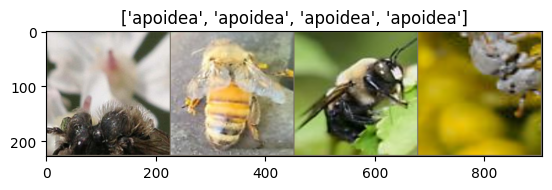

In [3]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

## Training the model

Now, let's write a general function to train a model. Here, we will
illustrate:

-  Scheduling the learning rate
-  Saving the best model

In the following, parameter ``scheduler`` is an LR scheduler object from
``torch.optim.lr_scheduler``.



In [4]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')
    
        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path))
    return model

### Visualizing the model predictions

Generic function to display predictions for a few images




In [5]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

## Finetuning the ConvNet

Load a pretrained model and reset final fully connected layer.




In [8]:
model_ft = models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to ``nn.Linear(num_ftrs, len(class_names))``.
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

### Train and evaluate

It should take around 15-25 min on CPU. On GPU though, it takes less than a
minute.

20-Nov-2023, Training complete in 9m 24s, Best val Acc: 0.950000 #just removed poor quality images

25-Nov-2023, Epoch 24/24
train Loss: 0.2256 Acc: 0.9162
val Loss: 0.3254 Acc: 0.9186

Training complete in 18m 54s
Best val Acc: 0.936047

03-Jan-2024, Training complete in 17m 60s
Best val Acc: 0.912791

25-Mar-2024, Training complete in 17m 49s
Best val Acc: 0.906977



In [9]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------
train Loss: 0.5248 Acc: 0.7784
val Loss: 0.2603 Acc: 0.8895

Epoch 1/24
----------
train Loss: 0.5714 Acc: 0.7665
val Loss: 0.3816 Acc: 0.8081

Epoch 2/24
----------
train Loss: 0.4160 Acc: 0.8144
val Loss: 0.3798 Acc: 0.8779

Epoch 3/24
----------
train Loss: 0.5720 Acc: 0.7924
val Loss: 0.3178 Acc: 0.8721

Epoch 4/24
----------
train Loss: 0.4042 Acc: 0.8323
val Loss: 0.3816 Acc: 0.8605

Epoch 5/24
----------
train Loss: 0.4464 Acc: 0.8204
val Loss: 0.3081 Acc: 0.8314

Epoch 6/24
----------
train Loss: 0.3909 Acc: 0.8503
val Loss: 0.4121 Acc: 0.8314

Epoch 7/24
----------
train Loss: 0.2852 Acc: 0.8743
val Loss: 0.3404 Acc: 0.8779

Epoch 8/24
----------
train Loss: 0.2929 Acc: 0.8942
val Loss: 0.3226 Acc: 0.8837

Epoch 9/24
----------
train Loss: 0.3179 Acc: 0.8822
val Loss: 0.2736 Acc: 0.9012

Epoch 10/24
----------
train Loss: 0.2496 Acc: 0.9022
val Loss: 0.2594 Acc: 0.9128

Epoch 11/24
----------
train Loss: 0.3143 Acc: 0.8982
val Loss: 0.2515 Acc: 0.9186

Ep

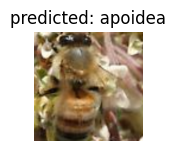

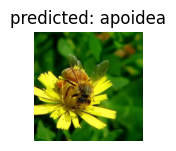

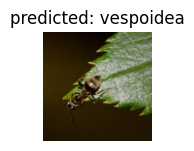

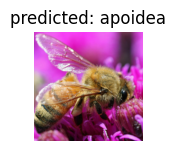

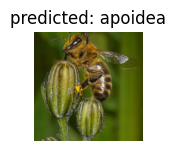

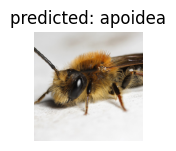

In [10]:
visualize_model(model_ft)

## ConvNet as fixed feature extractor

Here, we need to freeze all the network except the final layer. We need
to set ``requires_grad = False`` to freeze the parameters so that the
gradients are not computed in ``backward()``.

You can read more about this in the documentation
[here](https://pytorch.org/docs/notes/autograd.html#excluding-subgraphs-from-backward)_.




In [11]:
model_conv = torchvision.models.resnet18(weights='IMAGENET1K_V1')
for param in model_conv.parameters():
    param.requires_grad = False
#takes fixed weigths and finds way for better answer
# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

### Train and evaluate

20-Nov-2023, Training complete in 4m 32s, Best val Acc: 0.957143


On CPU this will take about half the time compared to previous scenario.
This is expected as gradients don't need to be computed for most of the
network. However, forward does need to be computed.

26-Nov-2023
Training complete in 8m 6s
Best val Acc: 0.924419

02-Jan-2024, Training complete in 8m 0s
Best val Acc: 0.906977

In [12]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.5334 Acc: 0.7565
val Loss: 0.2859 Acc: 0.8837

Epoch 1/24
----------
train Loss: 0.3703 Acc: 0.8423
val Loss: 0.2507 Acc: 0.8895

Epoch 2/24
----------
train Loss: 0.3960 Acc: 0.8224
val Loss: 0.2341 Acc: 0.8837

Epoch 3/24
----------
train Loss: 0.3173 Acc: 0.8703
val Loss: 0.2460 Acc: 0.8953

Epoch 4/24
----------
train Loss: 0.4366 Acc: 0.8303
val Loss: 0.2638 Acc: 0.8895

Epoch 5/24
----------
train Loss: 0.5373 Acc: 0.8024
val Loss: 0.3649 Acc: 0.8372

Epoch 6/24
----------
train Loss: 0.4066 Acc: 0.8523
val Loss: 0.2852 Acc: 0.8779

Epoch 7/24
----------
train Loss: 0.3357 Acc: 0.8563
val Loss: 0.2766 Acc: 0.8837

Epoch 8/24
----------
train Loss: 0.3224 Acc: 0.8683
val Loss: 0.2345 Acc: 0.9012

Epoch 9/24
----------
train Loss: 0.3228 Acc: 0.8723
val Loss: 0.2367 Acc: 0.9070

Epoch 10/24
----------
train Loss: 0.3298 Acc: 0.8503
val Loss: 0.2399 Acc: 0.9012

Epoch 11/24
----------
train Loss: 0.3757 Acc: 0.8423
val Loss: 0.2474 Acc: 0.8837

Ep

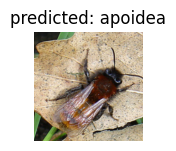

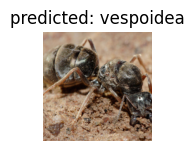

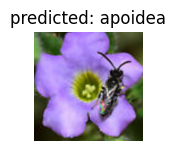

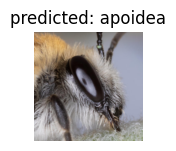

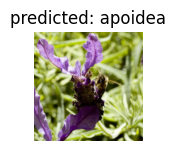

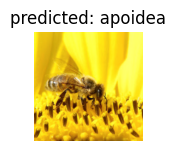

In [20]:
visualize_model(model_conv)

plt.ioff()
plt.show()

## Inference on custom images

20-Nov-2023, the id_inbox contains images downloaded from bugguide.net and collected from physical specimens with my USB camera.





Use the trained model to make predictions on custom images and visualize
the predicted class labels along with the images.




In [13]:
def visualize_model_predictions(model,img_path):
    was_training = model.training
    model.eval()

    img = Image.open(img_path)
    img = data_transforms['val'](img)
    img = img.unsqueeze(0)
    img = img.to(device)

    with torch.no_grad():
        outputs = model(img)
        _, preds = torch.max(outputs, 1)

        ax = plt.subplot(2,2,1)
        ax.axis('off')
        ax.set_title(f'Predicted: {class_names[preds[0]]}')
        imshow(img.cpu().data[0])
        
        model.train(mode=was_training)

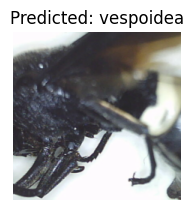

In [30]:
visualize_model_predictions(
    model_conv,
   #img_path='./data/hymenoptera_data/val/bees/72100438_73de9f17af.jpg'
   img_path='./data/hymenoptera_data/id_inbox/bug_id_08.jpg' 
)

plt.ioff()
plt.show()

# Results

00, correct
01, correct
02, correct
03, correct
incorrect bug_id_04.jpg predicted as bees
incorrect bug_id_05.jpg predicted as ants

## Further Learning

If you would like to learn more about the applications of transfer learning,
checkout our [Quantized Transfer Learning for Computer Vision Tutorial](https://pytorch.org/tutorials/intermediate/quantized_transfer_learning_tutorial.html).


Hymenoptera taxonomy list:

https://www.mapress.com/zootaxa/2013/f/zt03703p062.pdf

